In [19]:
from ics import Calendar
import pandas as pd

In [20]:
# Open the file for sports
with open("/Users/swimmingcircle/Downloads/sports.ics") as f:
    c = Calendar(f.read())

In [21]:
# Convert the events to a dataframe
event_list = [[event.name, event.begin, event.end, event.location, event.description, event.uid, event.status] for event in c.events]
df = pd.DataFrame(event_list)
df.columns = ['name', 'begin', 'end', 'location', 'description', 'uid', 'status']

In [22]:
#clean the datetime
df.begin = df.begin.apply(lambda x: x.datetime)
df.end = df.end.apply(lambda x: x.datetime)

df['begin'] = pd.to_datetime(df['begin'], utc = True)
df['end'] = pd.to_datetime(df['end'], utc = True)

In [23]:
# Select a range of datetime
start_date = pd.to_datetime('2021-12-31T00:30:00+00:00')
end_date = pd.to_datetime('2022-12-31T00:00:00+00:00')

In [24]:
#filter the dataframe
df = df[(df['begin'] >= start_date) & (df['end'] <= end_date)]
df.sort_values(by=['begin'], inplace=True)

# Calculate the duration
df['duration'] = df['end'] - df['begin']

In [25]:
week_activity_count = df.set_index('begin').resample('W-MON',base=1).count()
week_activity_duration = df.set_index('begin').resample('W-MON',base=1).sum()

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_27607/2742704522.py:1: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  week_activity_count = df.set_index('begin').resample('W-MON',base=1).count()
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_27607/2742704522.py:2: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  week_activity_duration = df.set_index('begin').resample('W-MON',base=1).sum()
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .a

In [26]:
week_activity = week_activity_count.reset_index()
week_activity = week_activity[['begin', 'name']] 

#change column name 
week_activity.columns = ['begin', 'activity_count']
week_activity.head()

,begin,activity_count
0,2022-01-10 00:00:00+00:00,1
1,2022-01-17 00:00:00+00:00,1
2,2022-01-24 00:00:00+00:00,0
3,2022-01-31 00:00:00+00:00,2
4,2022-02-07 00:00:00+00:00,2


In [27]:
#add duartion 
week_activity_duration['duration'] = week_activity_duration['duration'].dt.total_seconds() / 60
week_activity['duration'] = week_activity_duration['duration']


In [34]:
week_activity['duration'] = week_activity_duration['duration'].values
week_activity.head(10)

,begin,activity_count,duration
0,2022-01-10 00:00:00+00:00,1,90.0
1,2022-01-17 00:00:00+00:00,1,90.0
2,2022-01-24 00:00:00+00:00,0,0.0
3,2022-01-31 00:00:00+00:00,2,180.0
4,2022-02-07 00:00:00+00:00,2,180.0
5,2022-02-14 00:00:00+00:00,0,0.0
6,2022-02-21 00:00:00+00:00,0,0.0
7,2022-02-28 00:00:00+00:00,1,90.0
8,2022-03-07 00:00:00+00:00,1,90.0
9,2022-03-14 00:00:00+00:00,3,150.0


In [36]:
max_count = week_activity.iloc[week_activity['activity_count'].idxmax()]
max_duration = week_activity.iloc[week_activity['duration'].idxmax()]
max_count, max_duration

(begin             2022-05-02 00:00:00+00:00
 activity_count                           12
 duration                              630.0
 Name: 16, dtype: object,
 begin             2022-08-01 00:00:00+00:00
 activity_count                            4
 duration                              660.0
 Name: 29, dtype: object)

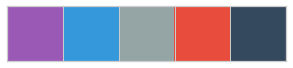

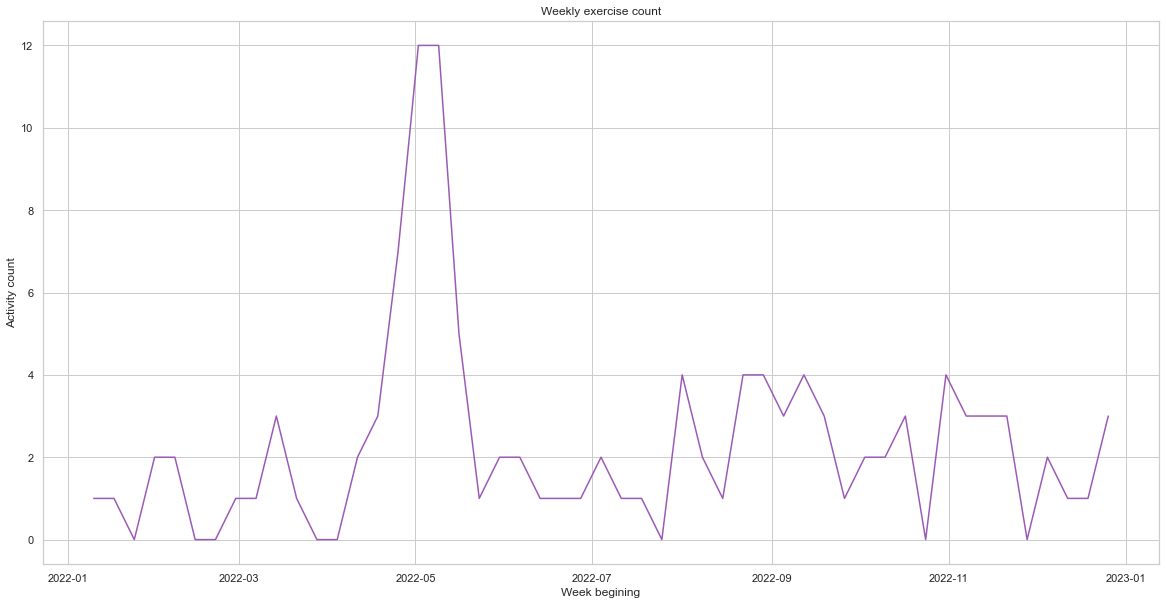

In [48]:
#visualize count 
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
sns.set_palette(colors)
sns.palplot(sns.color_palette())

plt.figure(figsize=(20,10))
ax = sns.lineplot(x="begin", y="activity_count", data=week_activity)
ax.set(xlabel='Week begining', ylabel='Activity count')
plt.title("Weekly exercise count")
plt.show()

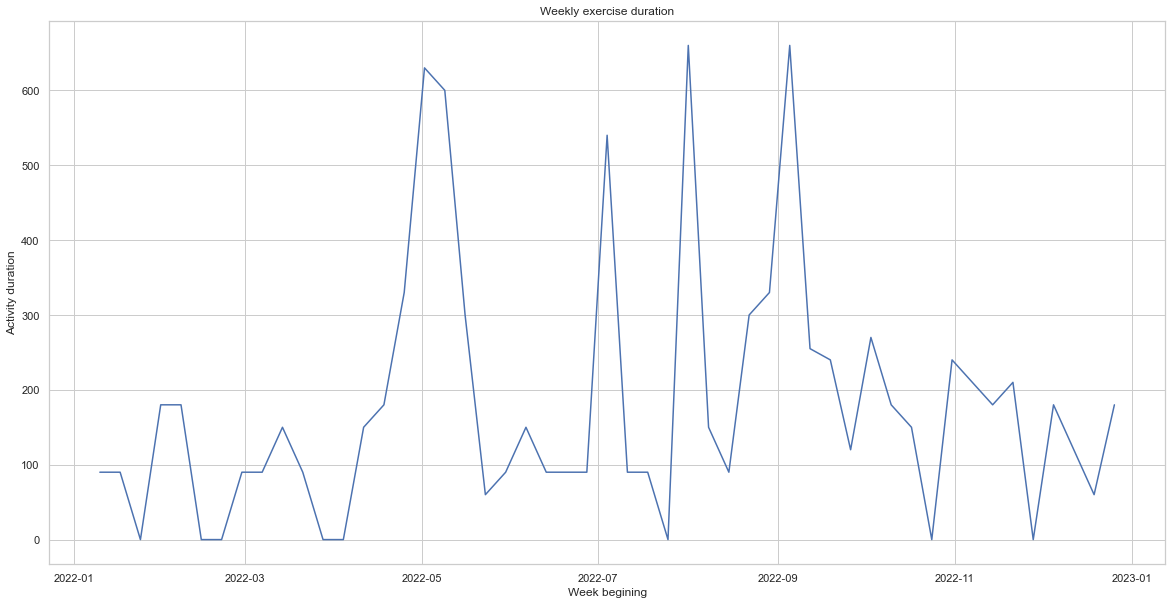

In [42]:
#visualize duration
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="begin", y="duration", data=week_activity)
ax.set(xlabel='Week begining', ylabel='Activity duration')
plt.title("Weekly exercise duration")
plt.show()

Text(0.5, 1.0, 'Weekly exercise count')

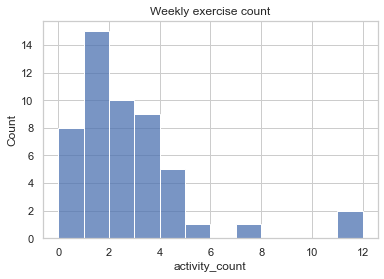

In [38]:
sns.histplot(week_activity['activity_count'], binwidth = 1, bins=20)
plt.title("Weekly exercise count")